# Load required packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf

# Fancier plot tool
import seaborn as sns
sns.set_theme(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=3, color_codes=True,rc={'figure.figsize':(15,10)})

In [2]:
_DATA_DIR = '/classes/2080001_spr2022/Data'

# Linear regression (orange juice)

In [3]:
# read data
oj = pd.read_csv('%s/oj.csv'%(_DATA_DIR))

In [4]:
oj.head()

,sales,price,brand,feat
0,8256.0,3.87,tropicana,0
1,6144.0,3.87,tropicana,0
2,3840.0,3.87,tropicana,0
3,8000.0,3.87,tropicana,0
4,8896.0,3.87,tropicana,0


In [5]:
# Generate the log price and log sales
oj['log_price'] = oj['price'].apply(lambda x: np.log(x))
oj['log_sales'] = oj['sales'].apply(lambda x: np.log(x))

In [6]:
oj

,sales,price,brand,feat,log_price,log_sales
0,8256.0,3.87,tropicana,0,1.353255,9.018695
1,6144.0,3.87,tropicana,0,1.353255,8.723231
2,3840.0,3.87,tropicana,0,1.353255,8.253228
3,8000.0,3.87,tropicana,0,1.353255,8.987197
4,8896.0,3.87,tropicana,0,1.353255,9.093357
...,...,...,...,...,...,...
28942,2944.0,2.00,dominicks,0,0.693147,7.987524
28943,4928.0,1.94,dominicks,0,0.662688,8.502689
28944,13440.0,1.59,dominicks,0,0.463734,9.505991
28945,55680.0,1.49,dominicks,0,0.398776,10.927376


## Visualization

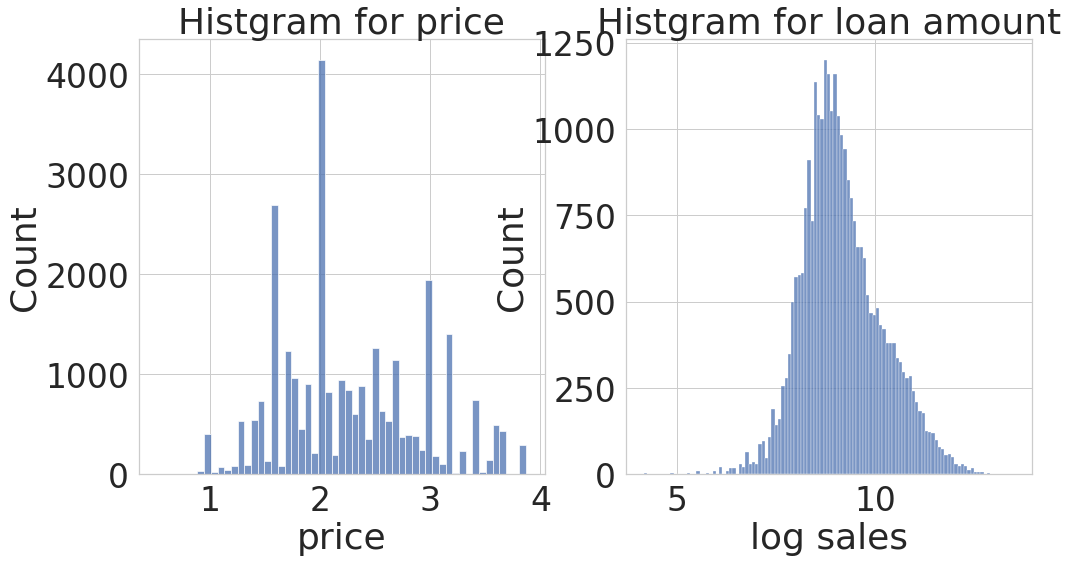

In [7]:
plt.figure(figsize = (16,8))

plt.subplot(1, 2, 1)
sns.histplot(oj, x="price");
plt.title('Histgram for price')

plt.subplot(1, 2, 2)
sns.histplot(oj, x="log_sales");
plt.xlabel('log sales')
plt.title('Histgram for loan amount')

plt.show()
#plt.savefig('histogram_oj.pdf')

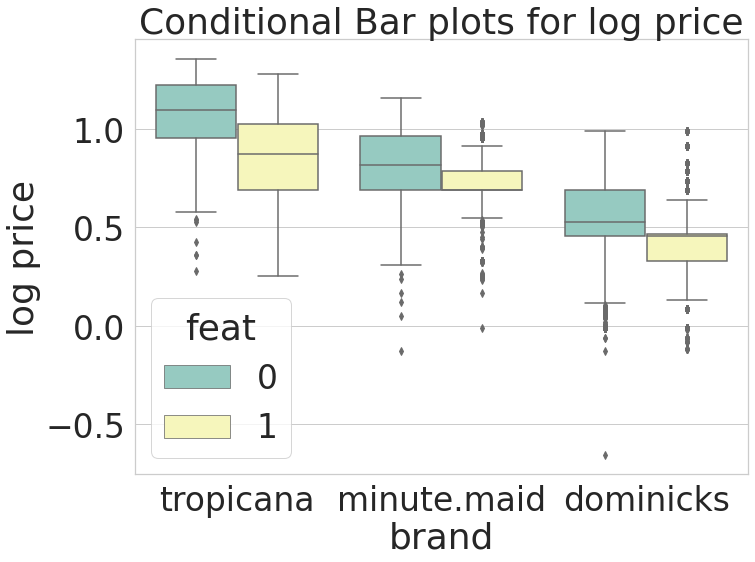

In [8]:
plt.figure(figsize = (11,8))

sns.boxplot(x="brand",y="log_price",hue="feat",data=oj,palette="Set3")
plt.ylabel('log price')
plt.title('Conditional Bar plots for log price')
plt.show()
#plt.savefig('box_oj.pdf')

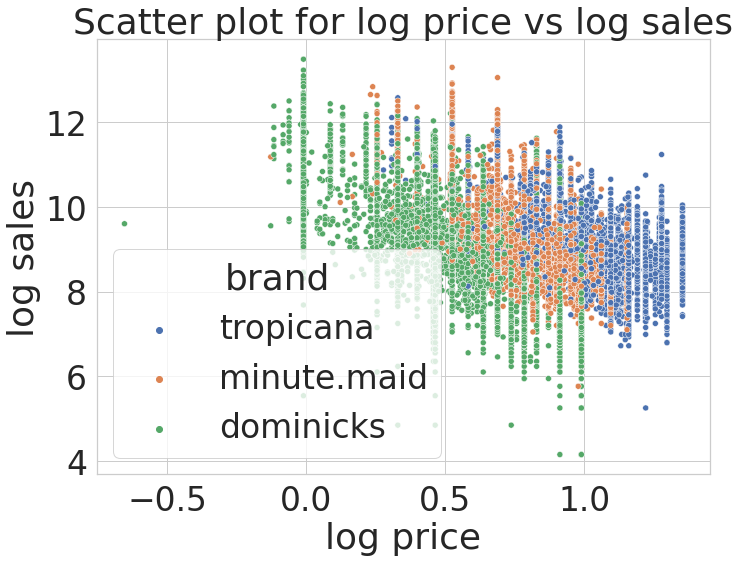

In [9]:
plt.figure(figsize = (11,8))

sns.scatterplot(x='log_price',y='log_sales',hue='brand', data = oj)
plt.xlabel('log price')
plt.ylabel('log sales')
plt.title('Scatter plot for log price vs log sales')
plt.show()
#plt.savefig('scatter_oj.pdf')

## Price Elasticity

In [10]:
reg = smf.glm(formula='log_sales ~ log_price + brand', data=oj).fit()
print(reg.summary()) 

                 Generalized Linear Model Regression Results                  
Dep. Variable:              log_sales   No. Observations:                28947
Model:                            GLM   Df Residuals:                    28943
Model Family:                Gaussian   Df Model:                            3
Link Function:               identity   Scale:                         0.62968
Method:                          IRLS   Log-Likelihood:                -34377.
Date:                Fri, 08 Apr 2022   Deviance:                       18225.
Time:                        14:39:37   Pearson chi2:                 1.82e+04
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               10.8288 

In [11]:
# regression coefficients
reg.params

Intercept               10.828822
brand[T.minute.maid]     0.870175
brand[T.tropicana]       1.529943
log_price               -3.138691
dtype: float64

## The Design Matrix

In [12]:
from patsy import dmatrix

x=pd.DataFrame(dmatrix(' ~ log_price + brand', data = oj)[[99, 199, 299,399,499,599]])
x.columns=['Intercept','brand[T.minute.maid]','brand[T.tropicana]','log_price']
x

,Intercept,brand[T.minute.maid],brand[T.tropicana],log_price
0,1.0,0.0,1.0,1.160021
1,1.0,1.0,0.0,1.026042
2,1.0,0.0,0.0,0.329304
3,1.0,0.0,1.0,1.078410
4,1.0,1.0,0.0,0.524729
5,1.0,0.0,0.0,0.783902


## Interaction

In [13]:
reg_interact = smf.glm(formula='log_sales ~ log_price * brand', data=oj).fit()
print(reg_interact.summary()) 

                 Generalized Linear Model Regression Results                  
Dep. Variable:              log_sales   No. Observations:                28947
Model:                            GLM   Df Residuals:                    28941
Model Family:                Gaussian   Df Model:                            5
Link Function:               identity   Scale:                         0.62588
Method:                          IRLS   Log-Likelihood:                -34289.
Date:                Fri, 08 Apr 2022   Deviance:                       18114.
Time:                        14:39:37   Pearson chi2:                 1.81e+04
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

## Advertisements

We could model the additive effect on log sales volume

$$E[\log({\tt v})] = \alpha_{b} + 
{1_{[{\tt feat}]}\alpha_{\tt feat}} + \beta_b\log({\tt p}) $$

Or this and its effect on elasticity

$$E[\log(v)] = \alpha_{b} + \beta_b\log({\tt p}) + 
{1_{[{\tt feat}]}\left(\alpha_{\tt feat} 
+ \beta_{\tt feat}\log({\tt p})\right)}$$

Or its brand-specific effect on elasticity

$$E[\log(v)] = \alpha_{b} + \beta_b\log({\tt p}) + 
{1_{[{\tt feat}]}\left(\alpha_{b,\tt feat} 
+ \beta_{b,\tt feat}\log({\tt p})\right)}$$

See below for all three models

In [14]:
# Add the intercation for 3 kinds variables
reg_full = smf.glm(formula='log_sales ~ log_price * brand * feat', data=oj).fit()
print(reg_full.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              log_sales   No. Observations:                28947
Model:                            GLM   Df Residuals:                    28935
Model Family:                Gaussian   Df Model:                           11
Link Function:               identity   Scale:                         0.48297
Method:                          IRLS   Log-Likelihood:                -30534.
Date:                Fri, 08 Apr 2022   Deviance:                       13975.
Time:                        14:39:37   Pearson chi2:                 1.40e+04
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

## Brand-specific Elasticities

In [15]:
# Construct the elasticities table
b = reg_full.params

data = [['Not featured & Dominicks', b["log_price"]], 
        ['Not featured & Minute Maid', b["log_price"] + b["log_price:brand[T.minute.maid]"]],
        ['Not featured & Tropicana', b["log_price"] + b["log_price:brand[T.tropicana]"]],
        ['Featured & Dominicks', b["log_price"] + b["log_price:feat"]], 
        ['Featured & Minute Maid', b["log_price"] + b["log_price:brand[T.minute.maid]"] + b["log_price:feat"] + b["log_price:brand[T.minute.maid]:feat"]],
        ['Featured & Tropicana', b["log_price"] + b["log_price"] + b["log_price:brand[T.tropicana]"] + b["log_price:feat"] + b["log_price:brand[T.tropicana]:feat"]]]

pd.DataFrame(data, columns = ['brand&feature', 'elastisity']).round(1)

,brand&feature,elastisity
0,Not featured & Dominicks,-2.8
1,Not featured & Minute Maid,-2.0
2,Not featured & Tropicana,-2.0
3,Featured & Dominicks,-3.2
4,Featured & Minute Maid,-3.6
5,Featured & Tropicana,-6.3


## Confounding

<Figure size 576x576 with 0 Axes>

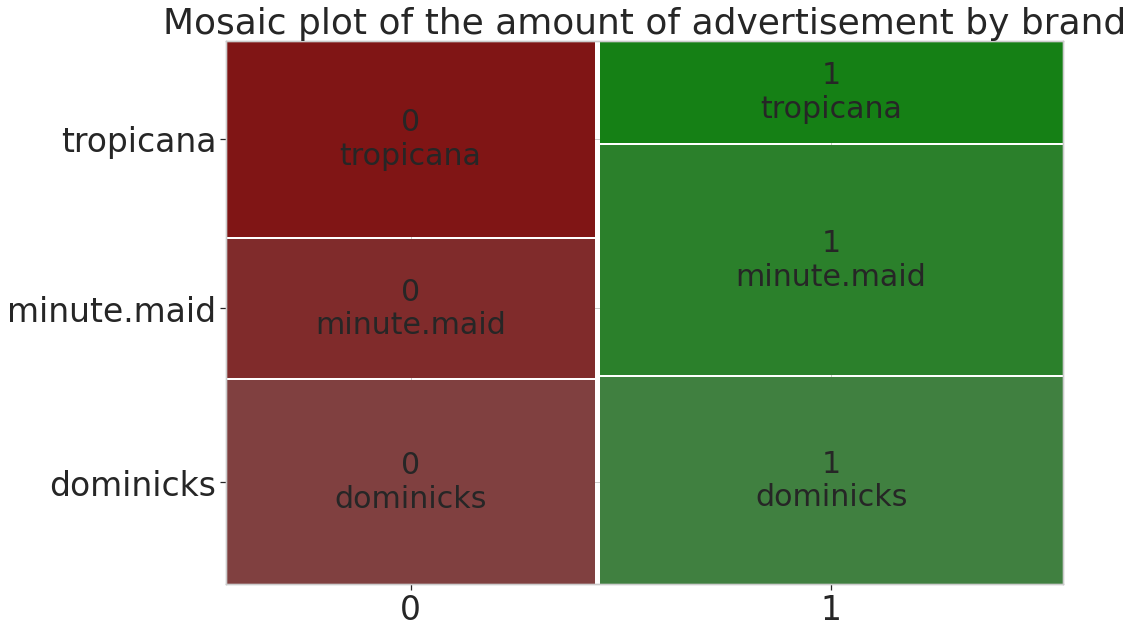

In [16]:
# table explaining why ads confounded our brand elasticity estimates
from statsmodels.graphics.mosaicplot import mosaic

oj_1 = pd.read_csv('%s/oj_1.csv'%(_DATA_DIR))
oj_1['move'] = oj_1.logmove.apply(lambda x: np.exp(x))
oj_1['sales_predict'] = reg_full.predict()

salestable = oj_1.pivot_table(aggfunc=np.sum, values='move', index=['feat', 'brand']).to_dict()
plt.figure(figsize = (8,8))
mosaic(salestable['move'])
plt.title('Mosaic plot of the amount of advertisement by brand')
plt.show()
#plt.savefig('mosaic_oj.pdf')

## Estimation and Goodness of Fit

In [17]:
print("oj null deviance:",round(reg_full.null_deviance,2))
print("oj deviance:",round(reg_full.deviance,2))
print("oj R2:",round(1-reg_full.deviance/reg_full.null_deviance,2))

oj null deviance: 30078.71
oj deviance: 13974.76
oj R2: 0.54


## Visualization of $\hat{y}$ vs $y$

Text(0.5, 1.0, 'fit plot for OJ linear regression')

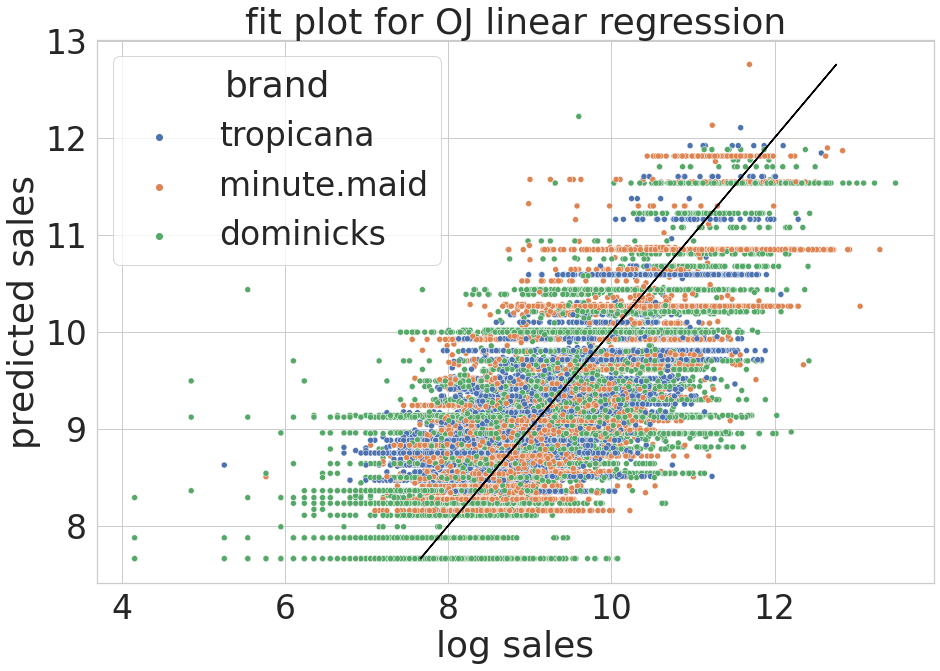

In [18]:
sns.scatterplot(x='logmove',y='sales_predict',hue='brand', data = oj_1)
logmove_linspace = np.linspace(oj_1['logmove'].min(), oj_1['logmove'].max(), 100)

plt.plot(oj_1['sales_predict'], oj_1['sales_predict'], 'black')
plt.xlabel('log sales')
plt.ylabel('predicted sales')
plt.title('fit plot for OJ linear regression')
# plt.savefig('regression_oj.pdf')

## Prediction

In [19]:
pd.DataFrame({'predict':reg_full.predict(oj[0:10]), 'true':oj_1.loc[0:9,'logmove']}).round(2)

,predict,true
0,8.36,9.02
1,8.36,8.72
2,8.36,8.25
3,8.36,8.99
4,8.36,9.09
5,8.36,8.88
6,8.69,9.29
7,8.69,8.95
8,8.69,9.05
9,8.69,8.61


# Logistic Regression (default example)

In [20]:
# read data
default = pd.read_csv('%s/default.csv'%(_DATA_DIR),index_col=0)

default.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,probability
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [21]:
## fit the full model
all_columns = " + ".join(default.columns.difference(["probability"]))

my_formula = "probability~" + all_columns

proba = smf.glm(formula=my_formula , data=default, family=sm.families.Binomial()).fit()
print(proba.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            probability   No. Observations:                30000
Model:                            GLM   Df Residuals:                    29976
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13939.
Date:                Fri, 08 Apr 2022   Deviance:                       27877.
Time:                        14:39:38   Pearson chi2:                 3.69e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.6863      0.119     -5.784      0.0

## Estimation and Goodness of Fit

In [22]:
print("default null deviance:",round(proba.null_deviance,2))
print("default deviance:",round(proba.deviance,2))
print("default R2:",round(1-proba.deviance/proba.null_deviance,2))

default null deviance: 31705.35
default deviance: 27877.2
default R2: 0.12


## Visualization of $\hat{y}$ vs $y$

Text(0.5, 1.0, 'fit plot for default logistic regression')

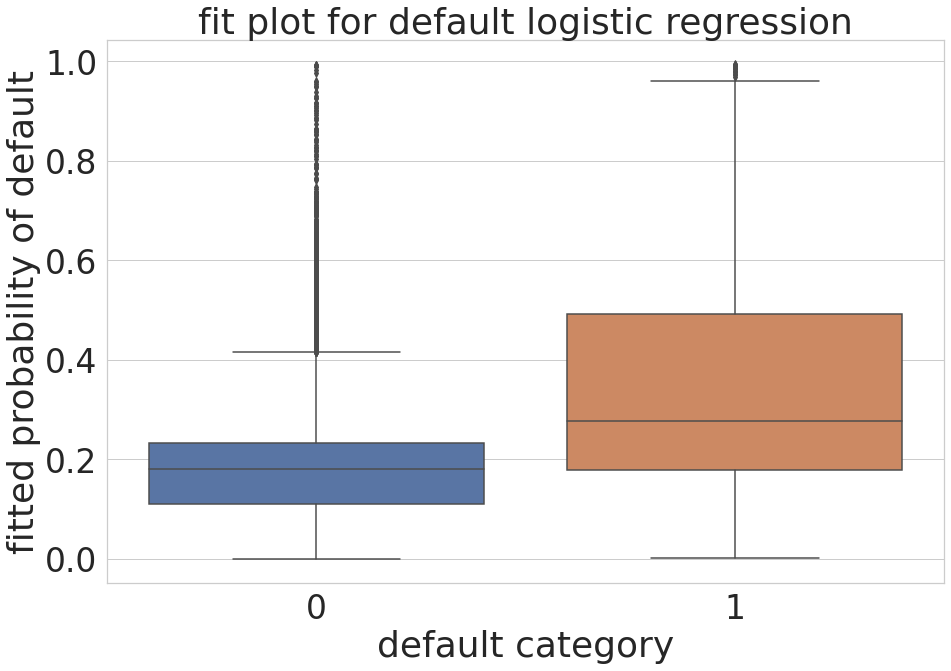

In [23]:
fitted = proba.fittedvalues.values
default_proba = default['probability']

sns.boxplot(x=default_proba,y=fitted)

plt.xlabel('default category')
plt.ylabel('fitted probability of default')
plt.title('fit plot for default logistic regression')
#plt.savefig('regression_default.pdf')

## Prediction

In [24]:
pd.DataFrame({'predict':proba.predict(default[0:9]), 'true':default.loc[0:9,'probability']}).round(2)

,predict,true
ID,,
1,0.51,1
2,0.15,1
3,0.20,0
4,0.24,0
5,0.14,0
6,0.24,0
7,0.06,0
8,0.17,0
9,0.24,0


## Out of sample prediction

In [25]:
import random
leaveout = random.sample(range(len(default)),1000)

# train the model WITHOUT these observations
probatrain = smf.glm(formula=my_formula , data=default.drop(leaveout), family=sm.families.Binomial()).fit()

# predicted probability of default on the left out data
pdefault = probatrain.predict(default.iloc[leaveout])

Text(0.5, 1.0, 'fit plot for default logistic regression (OOS)')

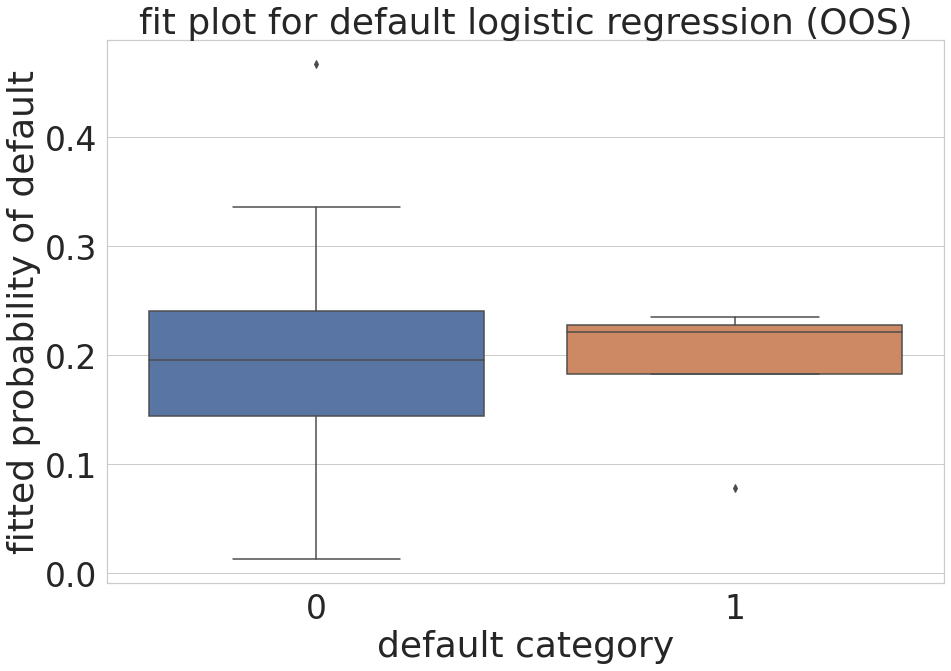

In [26]:
predict = pdefault
default_proba = default.loc[leaveout,'probability']

sns.boxplot(x=default_proba,y=predict)

plt.xlabel('default category')
plt.ylabel('fitted probability of default')
plt.title('fit plot for default logistic regression (OOS)')
#plt.savefig('oos_regression_default.pdf')